In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Warning message:
"package 'rgdal' was built under R version 3.6.3"Warning message:
"package 'sp' was built under R version 3.6.3"Warning message:
"package 'ggmap' was built under R version 3.6.3"Warning message:
"package 'maptools' was built under R version 3.6.3"Warning message:
"package 'viridis' was built under R version 3.6.3"Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R 

[1] "C:/postcorona_DA/data"

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum International_Terrestrial_Reference_Frame_2000 in CRS definition: +proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs"

OGR data source with driver: ESRI Shapefile 
Source: "C:\postcorona_DA\data\지도\CTPRVN.shp", layer: "CTPRVN"
with 17 features
It has 3 fields


Regions defined for each Polygons


'data.frame':	811814 obs. of  7 variables:
 $ long : num  966987 966987 966961 966931 966902 ...
 $ lat  : num  1941111 1941111 1941130 1941165 1941188 ...
 $ order: int  1 2 3 4 5 6 7 8 9 10 ...
 $ hole : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ piece: Factor w/ 2222 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id   : chr  "0" "0" "0" "0" ...
 $ group: Factor w/ 4724 levels "0.1","1.1","1.2",..: 1 1 1 1 1 1 1 1 1 1 ...


`summarise()` ungrouping output (override with `.groups` argument)


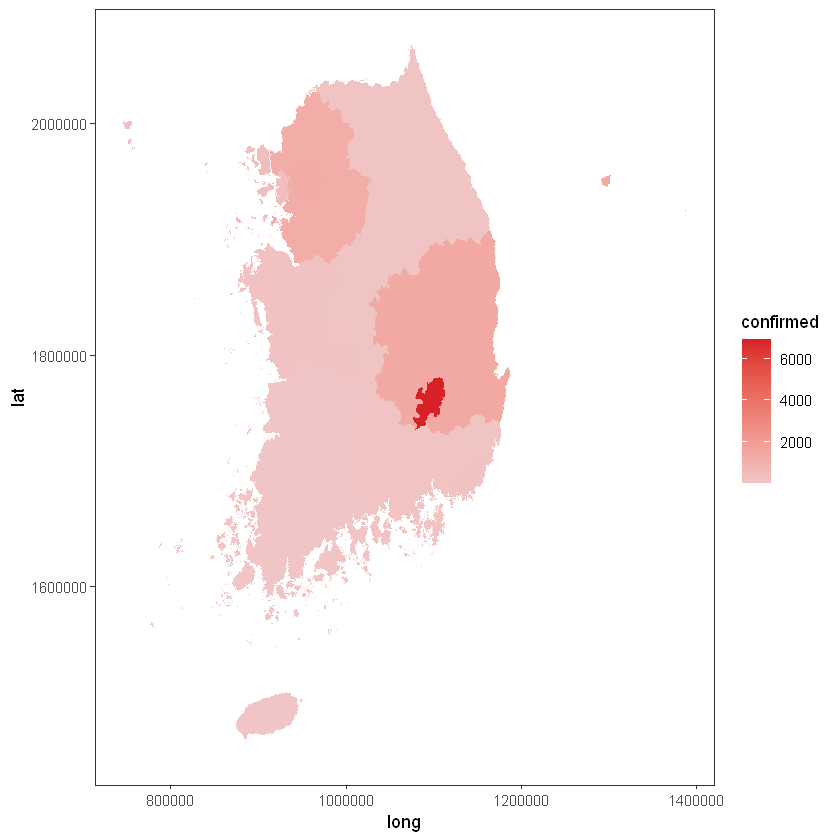

In [2]:

# 1 : preparation ---------------------------------------------------------
suppressPackageStartupMessages({ 
  library(rgdal,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(ggmap,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(sp,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(maptools,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(viridis,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(magrittr,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(scales,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(gridExtra,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(data.table, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tidyverse, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(lubridate, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(gridExtra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tfplot, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(tsfa, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(cluster, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(IRdisplay, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(foreign,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(extrafont,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(showtext,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
  library(grid,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
})


setwd('C:/postcorona_DA/data')
getwd()
# 2 : EDA -----------------------------------------------------------------

# 2-1 ---------------------------------------------------------------------
# A. 코로나19 사태 기본 분석
# 지역별, 나이대별, 성별 확진자 시각화
# a. 지역별 확진자 시각화 해석
# 지역별 확진자의 비율을 파악해 보도록 하겠습니다. 
# 먼저, 어떤 지역이 코로나 심각 지역인지 알아보기 위해 지역별 확진자의 수를 지도 위에 표시해 보도록 하겠습니다.

# C:/postcorona_DA/data/ =>C:/postcorona_DA/data/

#행정구역 지도를 가져와 줍니다.
korea_map_shp = rgdal::readOGR("C:/postcorona_DA/data/지도/CTPRVN.shp")
korea_map = fortify(korea_map_shp)


korea_map %>% str()

#지역별 확진자 수를 지도에 표시하기 위해 확진자 수 데이터를 가져오고, 알맞게 전처리해 줍니다.

TimeProvince <-fread('C:/postcorona_DA/data/COVID_19/TimeProvince.csv',
                     stringsAsFactors=FALSE, 
                     encoding = "UTF-8")

TimeProvince$date <- as.Date(TimeProvince$date)
TimeProvince$date <- as.character(TimeProvince$date,'%m/%d')

TimeProvince$province=TimeProvince$province %>% as.factor()

confirm_added=TimeProvince %>%
  group_by(province)%>% 
  summarize(N=max(confirmed))

confirm_added$province=plyr::revalue(confirm_added$province,c("서울"="0","부산"="1","대구"="2",
                                                              "인천"="3","광주"="4","대전"="5",
                                                              "울산"="6","세종"="7","경기도"="8",
                                                              "강원도"="9","충청북도"="10","충청남도"="11",
                                                              "전라북도"="12","전라남도"="13","경상북도"="14",
                                                              "경상남도"="15","제주도"="16"))


colnames(confirm_added)<-c("id","confirmed")


# 2-2 확진자 + 지도데이터 ---------------------------------------------------------

# 지도 데이터와 확진자 수 데이터를 해당하는 지역에 알맞게 병합하고, 지도에 나타내 줍니다.
# 각 지역별로 확진자 수를 넣고, 심각도에 따라 진한 색으로 나타내어 주었습니다.
# 서울, 경기, 경북, 그리고 대구가 코로나 19 확진자가 가장 많은 심각 지역인 것으로 보입니다.

korea_map=merge(korea_map,confirm_added, by="id")
mycorona=ggplot() + geom_polygon(data=korea_map, aes(x=long, y=lat, group=group, fill=confirmed))
mycorona+scale_fill_gradient(low = "#F1C5C5", high = "#D92027")+ 
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
        panel.grid.major.y = element_blank(), panel.grid.minor.y = element_blank(), 
        plot.title = element_text(face = "bold", size = 18, hjust = 0.5))





